In [2]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const

In [3]:
ptf13bvn = dataloader.load_comparison_json_phot('iPTF13bvn.json', phase0=(2456477.5 - 2400000.5))

# load the sn2019odp lc
ztf = table.Table.read('../data/ztflc_forcefit.h5')
ztf['mag'] = -2.5*np.log10(ztf['ampl']) + ztf['magzp']
ztf['phase'] = ztf['obsmjd'] - const.sne_peak_mjd['g']
ztf['mag_err'] = ztf['ampl.err']/ztf['ampl']*1.087 + ztf['magzprms']
ztf.sort('phase')

ptf13bvn

<ipython-input-3-e4e2ac4aba4b>:5: RuntimeWarning: invalid value encountered in log10
  ztf['mag'] = -2.5*np.log10(ztf['ampl']) + ztf['magzp']


mjd band instrument     mag  mag_err    phase
0    56459.238    r       None  18.611    0.050  -17.762
1    56459.291    r       None  18.619    0.050  -17.709
2    56460.240    r       None  17.612    0.040  -16.760
3    56460.288    r       None  17.552    0.040  -16.712
4    56460.377    i       None  17.668    0.010  -16.623
..         ...  ...        ...     ...      ...      ...
673  56752.455    r       None  21.419    0.210  275.455
674  56752.463    g       None  22.231    0.311  275.463
675  56779.008    g       None  22.941    0.289  302.008
676  56779.023    r       None  21.712    0.177  302.023
677  56812.948    r       None  21.995    0.281  335.948

[678 rows x 6 columns]

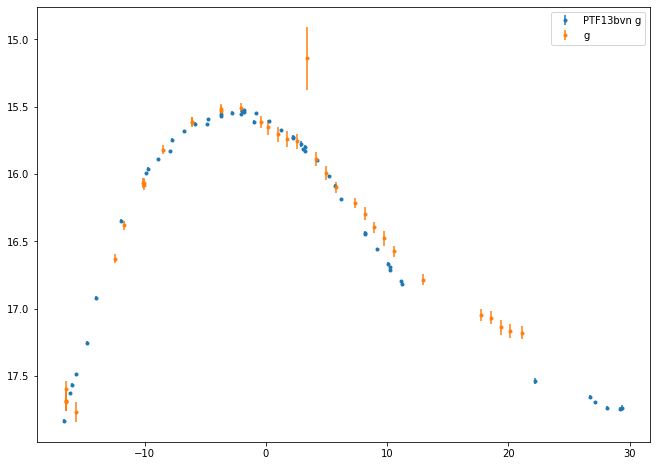

In [20]:
df = ptf13bvn.query("band == \"g\" and phase < 30")
plt.figure(figsize=(11,8))
plt.errorbar(df['phase'], df['mag'], yerr=df['mag_err'], label='PTF13bvn g', fmt='.')

band = 'g'
idx = np.logical_and(ztf['filter'] == ('ZTF_%s' % band),
                     np.logical_and(ztf['phase'] > -27, ztf['phase'] < 40))
plt.errorbar((ztf['obsmjd'][idx] - const.sne_peak_mjd['g']-4)*0.8, ztf['mag'][idx]-1.0, yerr=ztf['mag_err'][idx], label=band, fmt='.')

plt.gca().invert_yaxis()
plt.legend()

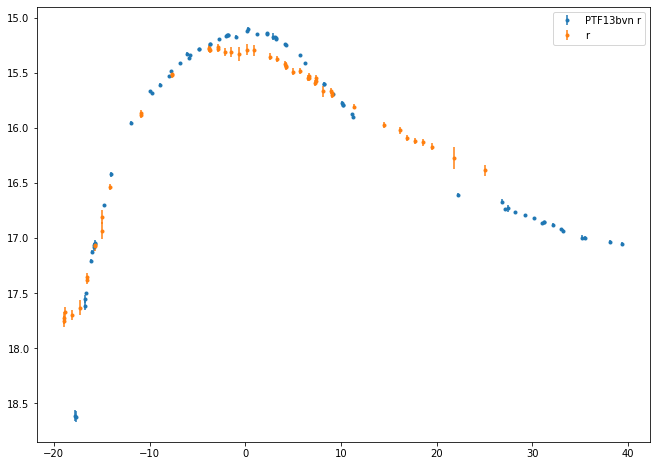

In [18]:
df = ptf13bvn.query("band == \"r\" and phase < 40")
plt.figure(figsize=(11,8))
plt.errorbar(df['phase'], df['mag'], yerr=df['mag_err'], label='PTF13bvn r', fmt='.')

band = 'r'
idx = np.logical_and(ztf['filter'] == ('ZTF_%s' % band),
                     np.logical_and(ztf['phase'] > -27, ztf['phase'] < 40))
plt.errorbar((ztf['obsmjd'][idx] - const.sne_peak_mjd['g']-6)*0.8, ztf['mag'][idx]-1.0, yerr=ztf['mag_err'][idx], label=band, fmt='.')

plt.gca().invert_yaxis()
plt.legend()

In [6]:
ptf13bvn.query('band == "r"')

mjd band instrument     mag  mag_err    phase
0    56459.238    r       None  18.611    0.050  -17.762
1    56459.291    r       None  18.619    0.050  -17.709
2    56460.240    r       None  17.612    0.040  -16.760
3    56460.288    r       None  17.552    0.040  -16.712
5    56460.378    r       None  17.500    0.010  -16.622
..         ...  ...        ...     ...      ...      ...
666  56698.239    r       None  20.576    0.094  221.239
668  56721.163    r       None  20.991    0.203  244.163
673  56752.455    r       None  21.419    0.210  275.455
676  56779.023    r       None  21.712    0.177  302.023
677  56812.948    r       None  21.995    0.281  335.948

[95 rows x 6 columns]

In [7]:
ptf13bvn.query('band == "U"')

mjd band instrument     mag  mag_err    phase
20   56461.0640    U       None  17.680    0.060 -15.9360
40   56462.0570    U       None  17.410    0.070 -14.9430
46   56462.2089    U       UVOT  17.932    0.170 -14.7911
47   56462.2089    U       UVOT  17.933    0.170 -14.7911
66   56464.8523    U       UVOT  16.545    0.086 -12.1477
67   56464.8523    U       UVOT  16.548    0.086 -12.1477
73   56464.9670    U       None  16.430    0.050 -12.0330
106  56468.1130    U       None  15.670    0.050  -8.8870
124  56470.1283    U       UVOT  15.811    0.069  -6.8717
125  56470.1283    U       UVOT  15.815    0.069  -6.8717
180  56473.5025    U       UVOT  16.041    0.072  -3.4975
181  56473.5025    U       UVOT  16.043    0.072  -3.4975
241  56477.6762    U       UVOT  16.604    0.083   0.6762
242  56477.6762    U       UVOT  16.608    0.084   0.6762
268  56479.7620    U       None  16.368    0.021   2.7620
309  56481.7459    U       UVOT  17.368    0.138   4.7459
310  56481.7459    U       UVOT  17.391    0.139   4.7459
338  56485.8460    U       None  18.010    0.100   8.8460
339  56486.0831    U       UVOT  18.371    0.209   9.0831
340  56486.0831    U       UVOT  18.410    0.215   9.0831
387  56494.2050    U       None  18.481    0.513  17.2050
390  56496.7235    U       UVOT  19.407    0.329  19.7235
391  56496.7235    U       UVOT  19.567    0.367  19.7235
462  56510.1390    U       None  19.026    0.492  33.1390
481  56512.1540    U       None  19.101    0.341  35.1540
521  56517.9680    U       None  19.366    0.310  40.9680
534  56518.4080    U       None  19.123    0.348  41.4080